<a href="https://colab.research.google.com/github/Suresh045/TNSDC/blob/main/weather_column.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv("/content/Project 1 - Weather Dataset.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [ ]:
dataset["Weather"].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [ ]:
dataset.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [ ]:
# Function to map into 6 categories (Clear, Rain, Snow, Thunderstorm, Fog, Other)
def simplify_weather(condition):
    condition = condition.lower()
    if "fog" in condition:   # check Fog first
        return "Fog"
    elif "clear" in condition or "cloudy" in condition or "haze" in condition:
        return "Clear"
    elif "rain" in condition or "drizzle" in condition:
        return "Rain"
    elif "snow" in condition:
        return "Snow"
    elif "thunderstorm" in condition:
        return "Thunderstorm"
    else:
        return "Other"

# Apply mapping
dataset["Weather_Category"] = dataset["Weather"].apply(simplify_weather)

# Check counts
print(dataset["Weather_Category"].value_counts())


Weather_Category
Clear           7258
Rain             616
Snow             482
Fog              426
Thunderstorm       2
Name: count, dtype: int64


In [ ]:
ind=dataset[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]

In [ ]:
dep=dataset[["Weather_Category"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cls=classification_report(y_test, y_pred)

In [ ]:
print(cls)

              precision    recall  f1-score   support

       Clear       0.94      0.94      0.94      1443
         Fog       0.83      0.82      0.83        85
        Rain       0.40      0.41      0.40       120
        Snow       0.61      0.61      0.61       109

    accuracy                           0.88      1757
   macro avg       0.70      0.70      0.70      1757
weighted avg       0.88      0.88      0.88      1757



Let's generate the confusion matrix to see the breakdown of correct and incorrect predictions for each weather category.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Suppose you have actual labels and predicted labels
y_true = dataset["Weather"]              # original detailed labels
y_pred = dataset["Weather_Category"]     # simplified categories (mapped)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=dataset["Weather_Category"].unique())

# Put into DataFrame for readability
cm_df = pd.DataFrame(cm,
                     index=dataset["Weather_Category"].unique(),
                     columns=dataset["Weather_Category"].unique())

print("Confusion Matrix:\n", cm_df)


Confusion Matrix:
               Fog  Clear  Rain  Snow  Thunderstorm
Fog           150      0     0     0             0
Clear           0   1326     0     0             0
Rain            0      0   306     0             0
Snow            0      0     0   390             0
Thunderstorm    0      0     0     0             0


🔹 Step 1: Initial Outlier Detection
Temp_C: 0 outliers
Dew Point Temp_C: 0 outliers
Rel Hum_%: 2 outliers
Wind Speed_km/h: 162 outliers
Visibility_km: 3539 outliers
Press_kPa: 207 outliers

🔹 Step 2: Normal Distribution Check


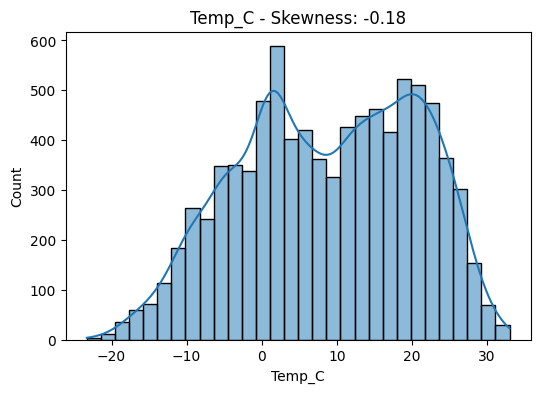

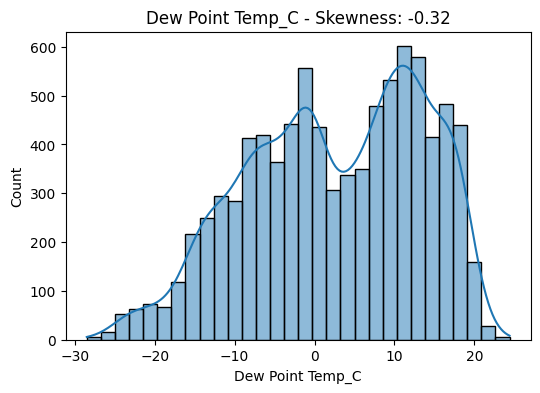

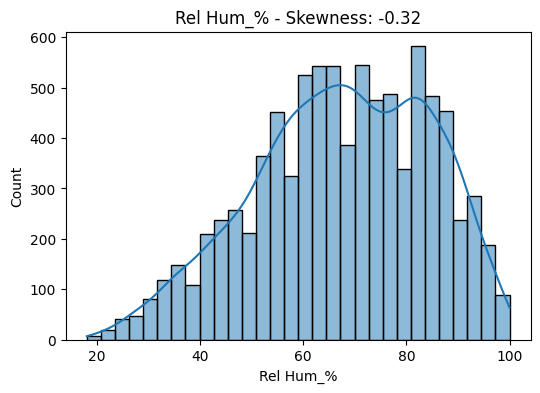

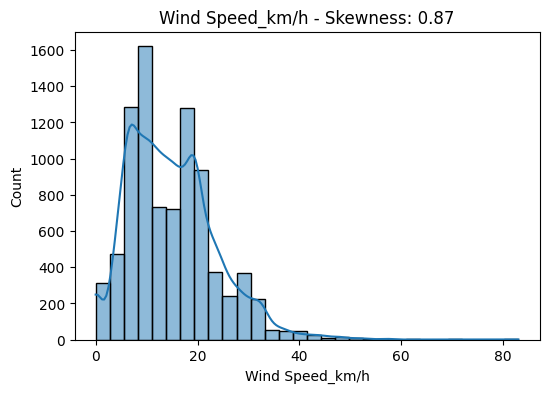

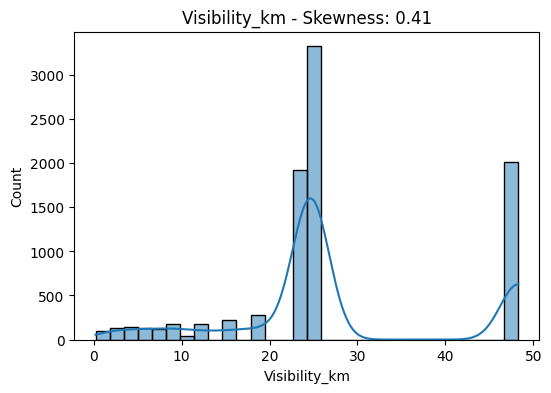

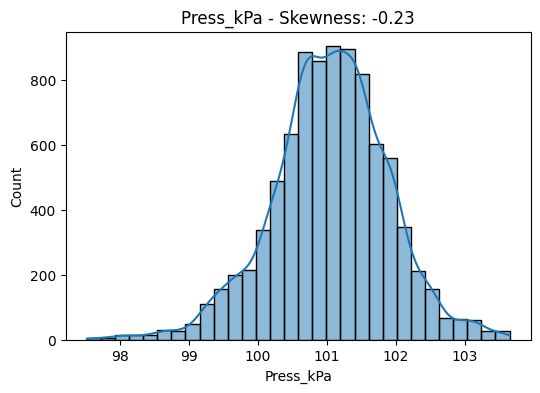


🔹 Step 3: Outlier Detection After Normality Check
Temp_C: 0 outliers (after cleaning)
Dew Point Temp_C: 0 outliers (after cleaning)
Rel Hum_%: 33 outliers (after cleaning)
Wind Speed_km/h: 0 outliers (after cleaning)
Visibility_km: 0 outliers (after cleaning)
Press_kPa: 6 outliers (after cleaning)


In [ ]:
# Step 1: Detect Outliers (using IQR method)
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)][col]
    return outliers

numeric_cols = dataset.select_dtypes(include=['float64','int64']).columns

# Step 1: Initial Outlier Counts
print("🔹 Step 1: Initial Outlier Detection")
for col in numeric_cols:
    outliers = detect_outliers(dataset, col)
    print(f"{col}: {len(outliers)} outliers")

# Step 2: Check Normal Distribution (Skewness & Plots)
print("\n🔹 Step 2: Normal Distribution Check")
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(dataset[col], kde=True, bins=30)
    skew_val = dataset[col].skew()
    plt.title(f"{col} - Skewness: {skew_val:.2f}")
    plt.show()

# Step 3: Remove Outliers & Check Again
print("\n🔹 Step 3: Outlier Detection After Normality Check")
cleaned_dataset = dataset.copy()

for col in numeric_cols:
    Q1 = cleaned_dataset[col].quantile(0.25)
    Q3 = cleaned_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    cleaned_dataset = cleaned_dataset[(cleaned_dataset[col] >= lower) & (cleaned_dataset[col] <= upper)]

for col in numeric_cols:
    outliers = detect_outliers(cleaned_dataset, col)
    print(f"{col}: {len(outliers)} outliers (after cleaning)")

🔹 Step 1: Initial Outlier Detection
Temp_C: 0 outliers
Dew Point Temp_C: 0 outliers
Rel Hum_%: 2 outliers
Wind Speed_km/h: 162 outliers
Visibility_km: 3539 outliers
Press_kPa: 207 outliers

🔹 Step 2: Normal Distribution Check


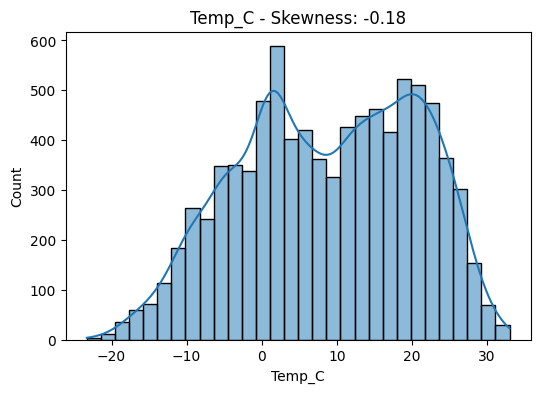

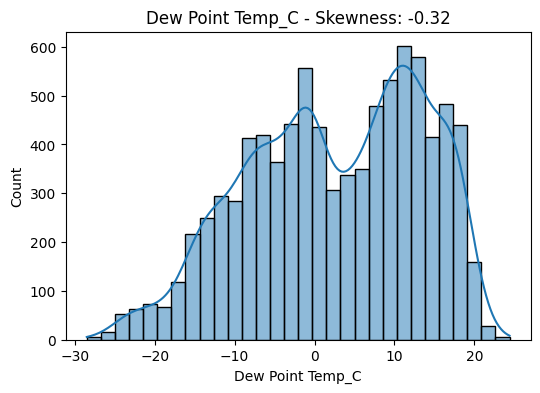

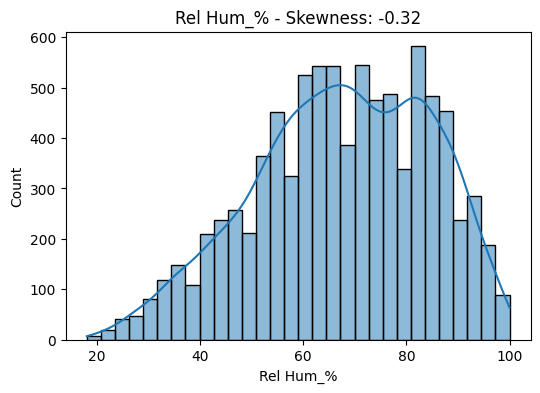

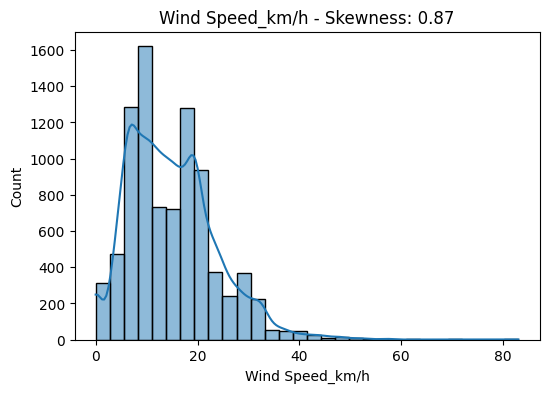

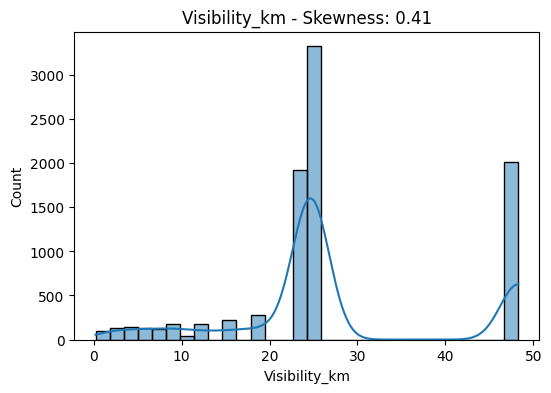

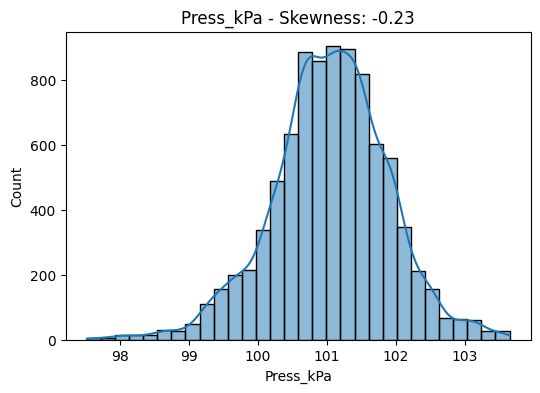


🔹 Step 3: Outlier Replacement (Capping Method)
Temp_C: 0 outliers (after replacement)
Dew Point Temp_C: 0 outliers (after replacement)
Rel Hum_%: 0 outliers (after replacement)
Wind Speed_km/h: 0 outliers (after replacement)
Visibility_km: 0 outliers (after replacement)
Press_kPa: 0 outliers (after replacement)


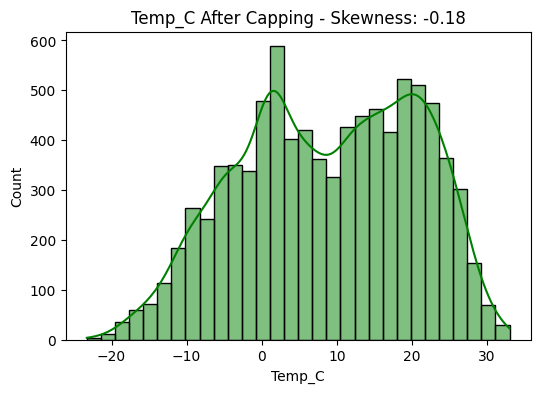

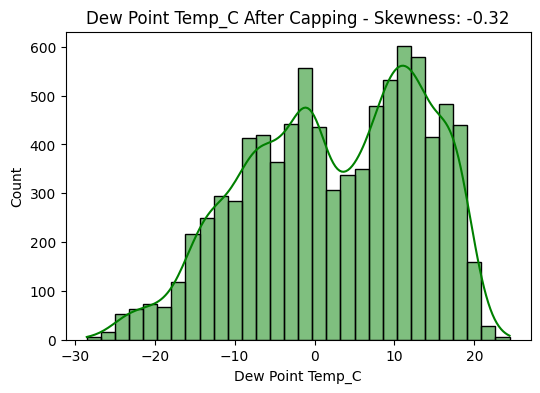

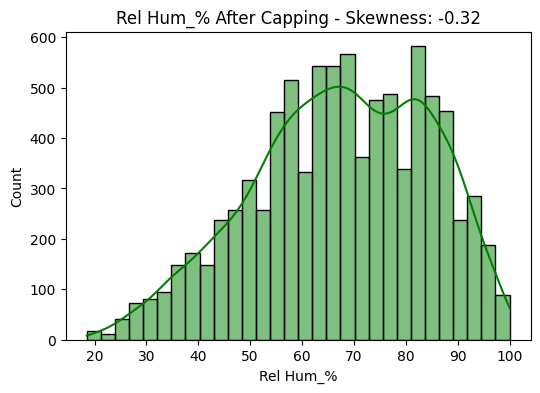

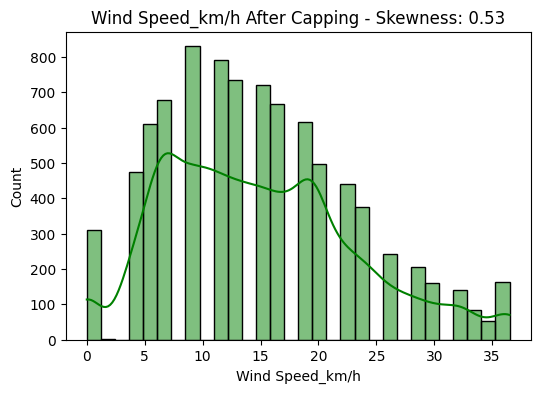

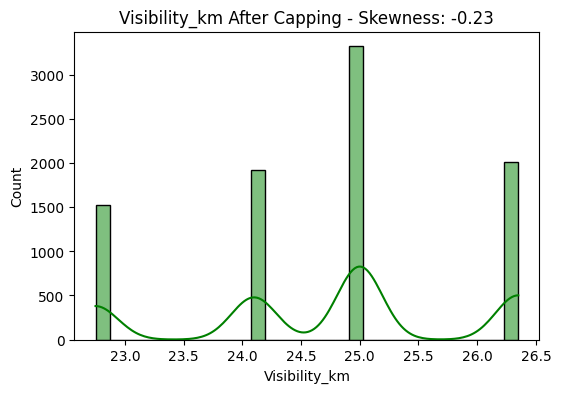

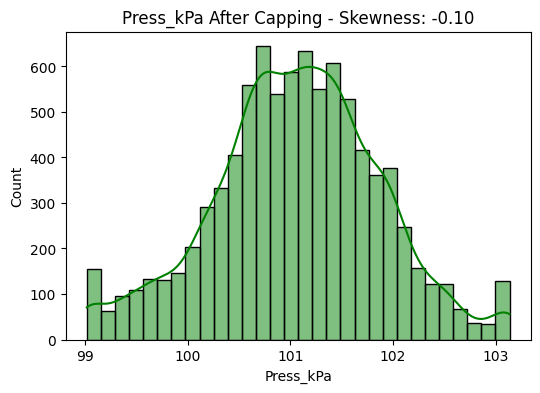

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Detect Outliers (using IQR method)
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)][col]
    return outliers, lower, upper

numeric_cols = dataset.select_dtypes(include=['float64','int64']).columns

# Step 1: Initial Outlier Counts
print("🔹 Step 1: Initial Outlier Detection")
for col in numeric_cols:
    outliers, lower, upper = detect_outliers(dataset, col)
    print(f"{col}: {len(outliers)} outliers")

# Step 2: Check Normal Distribution (Skewness & Plots)
print("\n🔹 Step 2: Normal Distribution Check")
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(dataset[col], kde=True, bins=30)
    skew_val = dataset[col].skew()
    plt.title(f"{col} - Skewness: {skew_val:.2f}")
    plt.show()

# Step 3: Replace Outliers (Capping instead of removing)
print("\n🔹 Step 3: Outlier Replacement (Capping Method)")
capped_dataset = dataset.copy()

for col in numeric_cols:
    outliers, lower, upper = detect_outliers(capped_dataset, col)
    capped_dataset[col] = capped_dataset[col].clip(lower, upper)  # replace values
    new_outliers, _, _ = detect_outliers(capped_dataset, col)
    print(f"{col}: {len(new_outliers)} outliers (after replacement)")

# Optional: Plot distributions after capping
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(capped_dataset[col], kde=True, bins=30, color="green")
    skew_val = capped_dataset[col].skew()
    plt.title(f"{col} After Capping - Skewness: {skew_val:.2f}")
    plt.show()


🔹 Step 1: Initial Outlier Detection
Temp_C: 0 outliers
Dew Point Temp_C: 0 outliers
Rel Hum_%: 2 outliers
Wind Speed_km/h: 162 outliers
Visibility_km: 3539 outliers
Press_kPa: 207 outliers

🔹 Step 2: Normal Distribution Check


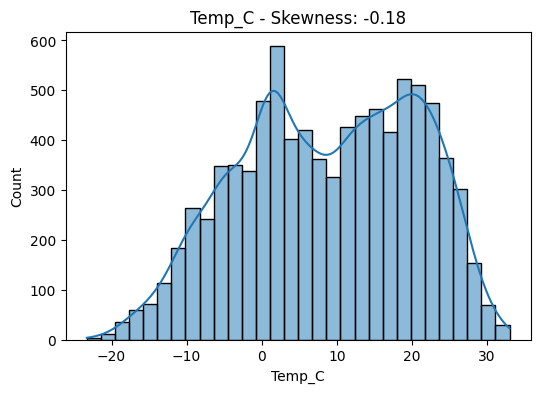

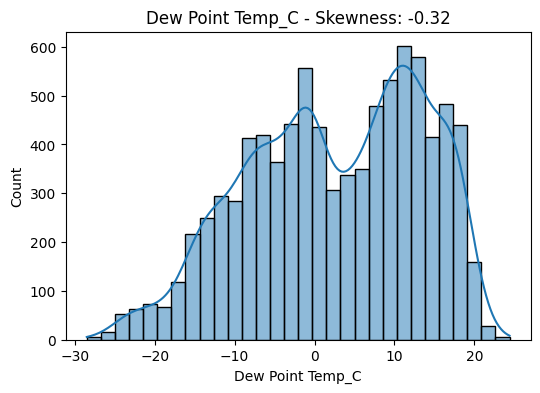

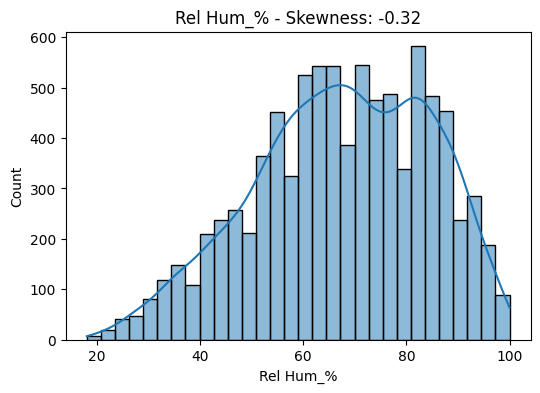

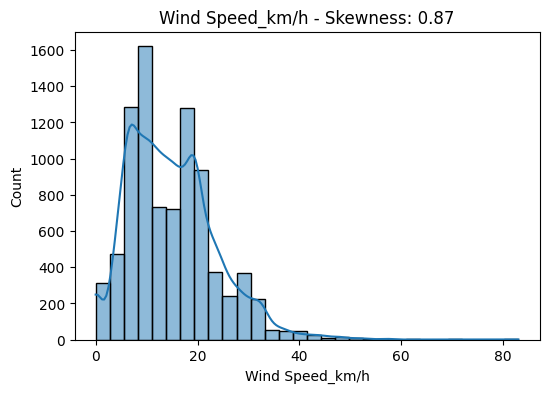

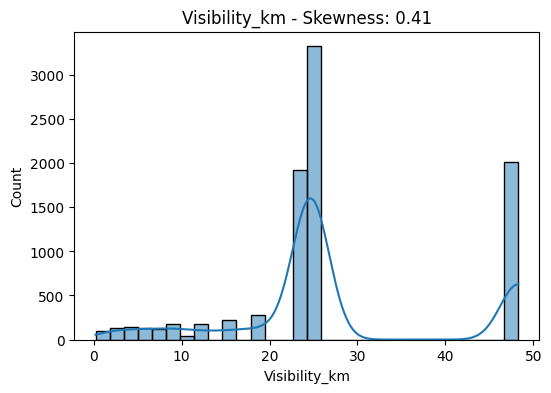

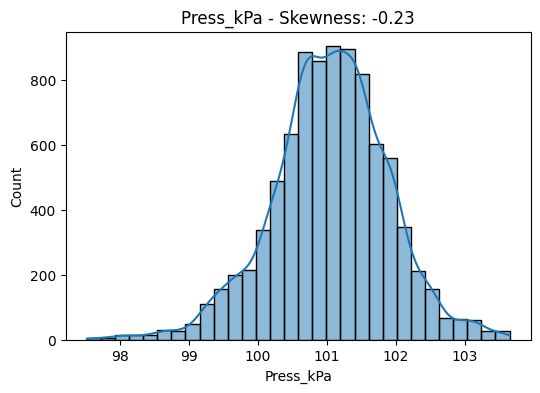


🔹 Step 3: Outlier Replacement (Capping Method)
Temp_C: 0 outliers (after replacement)
Dew Point Temp_C: 0 outliers (after replacement)
Rel Hum_%: 0 outliers (after replacement)
Wind Speed_km/h: 0 outliers (after replacement)
Visibility_km: 0 outliers (after replacement)
Press_kPa: 0 outliers (after replacement)


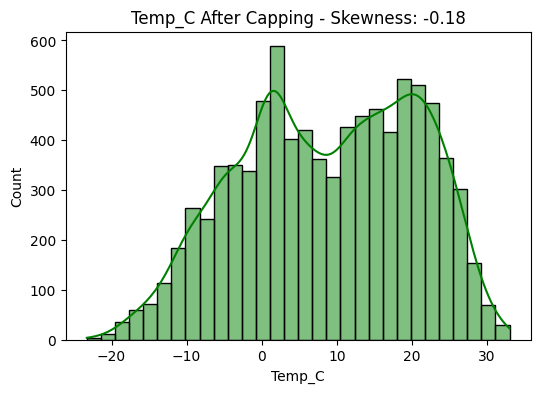

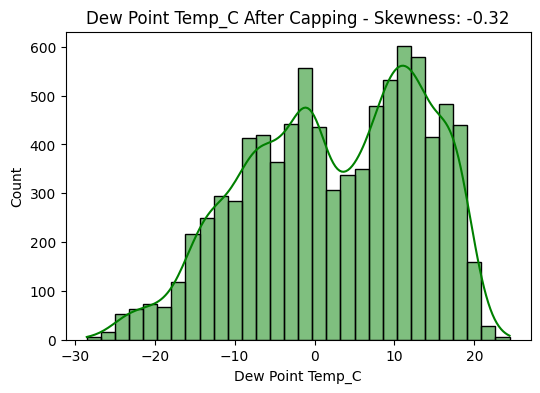

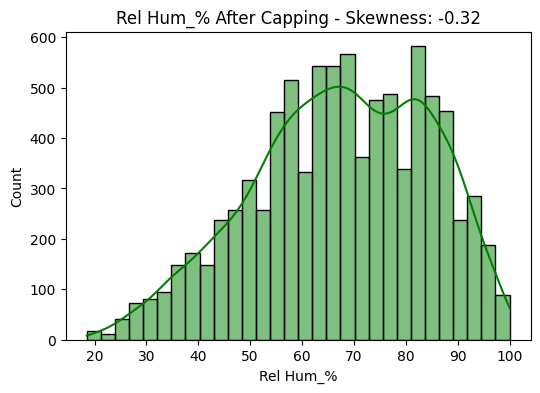

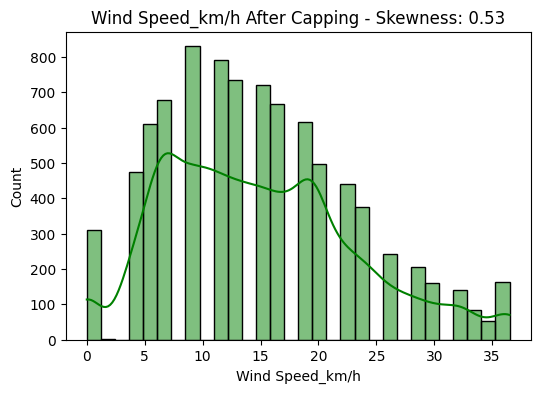

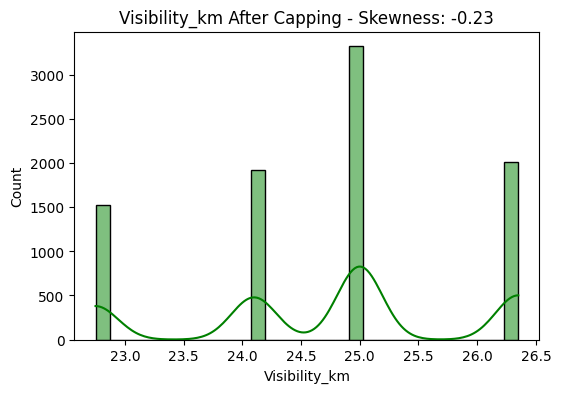

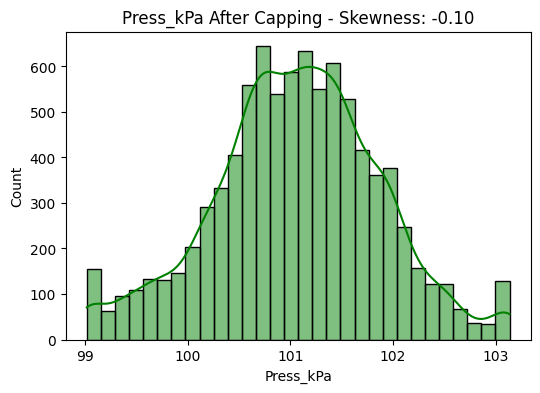

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Detect Outliers (using IQR method)
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)][col]
    return outliers, lower, upper

numeric_cols = dataset.select_dtypes(include=['float64','int64']).columns

# Step 1: Initial Outlier Counts
print("🔹 Step 1: Initial Outlier Detection")
for col in numeric_cols:
    outliers, lower, upper = detect_outliers(dataset, col)
    print(f"{col}: {len(outliers)} outliers")

# Step 2: Check Normal Distribution (Skewness & Plots)
print("\n🔹 Step 2: Normal Distribution Check")
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(dataset[col], kde=True, bins=30)
    skew_val = dataset[col].skew()
    plt.title(f"{col} - Skewness: {skew_val:.2f}")
    plt.show()

# Step 3: Replace Outliers (Capping instead of removing)
print("\n🔹 Step 3: Outlier Replacement (Capping Method)")
capped_dataset = dataset.copy()

for col in numeric_cols:
    outliers, lower, upper = detect_outliers(capped_dataset, col)
    capped_dataset[col] = capped_dataset[col].clip(lower, upper)  # replace values
    new_outliers, _, _ = detect_outliers(capped_dataset, col)
    print(f"{col}: {len(new_outliers)} outliers (after replacement)")

# Optional: Plot distributions after capping
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(capped_dataset[col], kde=True, bins=30, color="green")
    skew_val = capped_dataset[col].skew()
    plt.title(f"{col} After Capping - Skewness: {skew_val:.2f}")
    plt.show()


In [ ]:
numeric_cols = dataset.select_dtypes(include=['float64','int64']).columns

print("Skewness for each numeric column:")
for col in numeric_cols:
    skew_val = dataset[col].skew()
    print(f"{col}: {skew_val:.2f}")

Skewness for each numeric column:
Temp_C: -0.18
Dew Point Temp_C: -0.32
Rel Hum_%: -0.32
Wind Speed_km/h: 0.87
Visibility_km: 0.41
Press_kPa: -0.23


After Square Root Transformation Skewness: -0.51


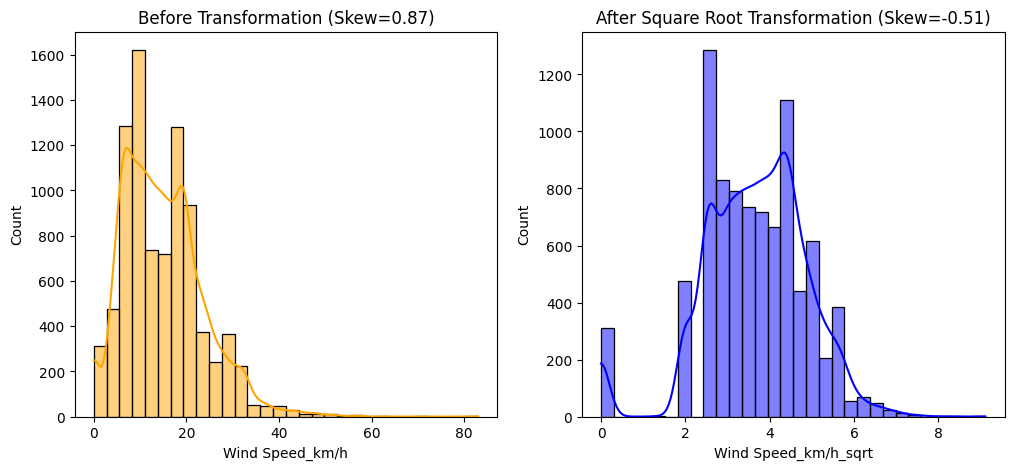

In [ ]:
# Square root transformation
dataset['Wind Speed_km/h_sqrt'] = np.sqrt(dataset['Wind Speed_km/h'])

# Skewness after transformation
sqrt_skew = dataset['Wind Speed_km/h_sqrt'].skew()
print(f"After Square Root Transformation Skewness: {sqrt_skew:.2f}")

# Plot before & after
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(dataset['Wind Speed_km/h'], kde=True, bins=30, ax=axes[0], color="orange")
axes[0].set_title(f"Before Transformation (Skew=0.87)")

sns.histplot(dataset['Wind Speed_km/h_sqrt'], kde=True, bins=30, ax=axes[1], color="blue")
axes[1].set_title(f"After Square Root Transformation (Skew={sqrt_skew:.2f})")

plt.show()


In [ ]:
numeric_cols = dataset.select_dtypes(include=['float64','int64']).columns

print("Skewness for each numeric column:")
for col in numeric_cols:
    skew_val = dataset[col].skew()
    print(f"{col}: {skew_val:.2f}")

Skewness for each numeric column:
Temp_C: -0.18
Dew Point Temp_C: -0.32
Rel Hum_%: -0.32
Wind Speed_km/h: 0.87
Visibility_km: 0.41
Press_kPa: -0.23
Wind Speed_km/h_sqrt: -0.51
